#MINE-4101: CIENCIA DE DATOS APLICADA - TALLER 4 

Oscar Fernando Bosigas Puerto – 202220008 - o.bosigas

Yeimy Andrea Cano M – 202213304 - y.cano

David Polania Mejia - 202213328 - d.polaniam


In [370]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.2 MB/s 


In [371]:
#Importaciones necesarias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#from pandas_profiling import ProfileReport
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from joblib import dump
import shap

# **Entendimiento de los Datos**

Primero se procede a hacer el cargue de los datos que están en el repositorio git del proyecto.

In [316]:
data = pd.read_json('https://raw.githubusercontent.com/yacanom/CDA_taller-4/main/DataSet_Entrenamiento_v1.json')

El diccionario de datos provistos es:

|Field | Description|
| --- | --- |
|customerID | Customer ID|
|gender | Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner| Whether the customer has a partner or not (Yes, No)|
|Dependents| Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService| Whether the customer has a phone service or not (Yes, No)|
|MultipleLines| Whether the customer has multiple lines or not (Yes, No, No phoneservice)|
|InternetService| Customer’s internet service provider (DSL, Fiber optic, No) |
|OnlineSecurity| Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup| Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection| Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport| Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV| Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies| Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract| The contract term of the customer (Month-to-month, One year, Two  year)|
|PaperlessBilling| Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod| The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges| The amount charged to the customer monthly|
|TotalCharges| The total amount charged to the customer|
|Churn| Whether the customer churned or not (Yes or No)|

---




In [317]:
#se identifica el total de datos que se tienen:
data.shape

(6000, 21)

Se hace una exploración a alto nivel de los datos:

In [318]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [319]:
#Conocer los tipos de datos:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


No se identifican datos faltantes. Se tienen 3 variables de tipo numérico: tenure, MonthlyCharges y SeniorCitizen, esta ultima realmente es categórica y tiene dos posibles opciones 0 y 1

In [320]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6000.000000,6000.000000,6000.000000
mean,0.160167,32.320667,64.607233
std,0.366791,24.637296,30.195382
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.000000
50%,0.000000,29.000000,70.300000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,118.750000


## Variables Numéricas

###tenure          

In [321]:
#Ver datos con clientes de 0 años con el servicio:
data[ data['tenure'] == 0 ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [322]:
#Ver clientes con más de 56 años con el servicio:
data[ data['tenure'] >= 56 ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
6,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
9,2848-YXSMW,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1363.25,No
14,5256-SKJGO,Female,0,Yes,Yes,64,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,54.60,3423.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,8441-SHIPE,Female,0,No,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.60,1790.35,No
5981,4597-ELFTS,Male,0,No,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1334,Yes
5982,1320-GVNHT,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),108.40,7767.25,No
5988,8071-SBTRN,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,No


No se identifican problemas de calidad relacionados con categoría columna "tenure". Se asumen que los clientes en 0 meses, que corresponden a 10 casos son clientes nuevos en la compañia.

###MonthlyCharges

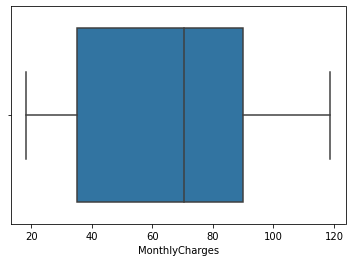

In [323]:
sns.boxplot(x=data["MonthlyCharges"])

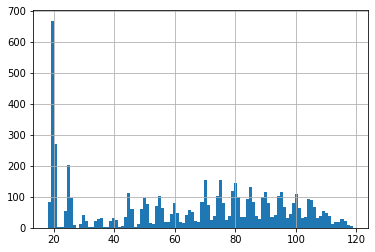

In [324]:
data['MonthlyCharges'].hist(bins = 100)

In [325]:
data['MonthlyCharges'].describe(percentiles = [.01, .05, .1, .15, .25, .5, .75, .95, .99])

count    6000.000000
mean       64.607233
std        30.195382
min        18.250000
1%         19.200000
5%         19.650000
10%        20.050000
15%        20.550000
25%        35.000000
50%        70.300000
75%        89.850000
95%       107.500000
99%       115.050000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [326]:
np.log(data['MonthlyCharges']).describe(percentiles = [.01, .05, .1, .15, .25, .5, .75, .95, .99])

count    6000.000000
mean        4.018102
std         0.596834
min         2.904165
1%          2.954910
5%          2.978077
10%         2.998229
15%         3.022861
25%         3.555348
50%         4.252772
75%         4.498142
95%         4.677491
99%         4.745367
max         4.777020
Name: MonthlyCharges, dtype: float64

###TotalCharges

La variable TotalCharges la está identificando de tipo objeto, se hace la conversión a número:

In [327]:
data['TotalCharges'] =  pd.to_numeric(data['TotalCharges'])

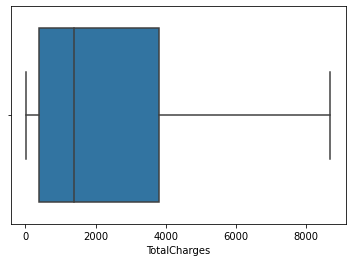

In [328]:
sns.boxplot(x=data["TotalCharges"])

In [329]:
data['TotalCharges'].describe(percentiles = [.01, .05, .1, .15, .25, .5, .75, .95, .99])

count    5990.000000
mean     2281.988155
std      2274.401428
min        18.800000
1%         19.894500
5%         48.757500
10%        83.390000
15%       161.467500
25%       389.337500
50%      1391.950000
75%      3803.725000
95%      6949.395000
99%      8059.141500
max      8684.800000
Name: TotalCharges, dtype: float64

En este punto se ideintifica que se tienen 10 registros nulos en esta variable.
Y que existen valores superiores muy altos respecto a la media.

In [330]:
#Identificar los datos nulos
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [331]:
#Para los datos faltantes se usa la mediana para tener esos valores:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [332]:
data['TotalCharges'].describe(percentiles = [.15, .25, .5, .75, .95, .99])

count    6000.000000
mean     2280.504758
std      2272.795023
min        18.800000
15%       161.627500
25%       389.912500
50%      1391.950000
75%      3796.912500
95%      6944.945000
99%      8058.876500
max      8684.800000
Name: TotalCharges, dtype: float64

In [333]:
#se revisa la distribución de los datos si se aplicase una transformación logartimica a los datos.
np.log(data['TotalCharges']).describe(percentiles = [.15, .25, .5, .75, .95, .99])

count    6000.000000
mean        6.931557
std         1.559826
min         2.933857
15%         5.085294
25%         5.965922
50%         7.238461
75%         8.241943
95%         8.845769
99%         8.994529
max         9.069330
Name: TotalCharges, dtype: float64

De acuerdo a la distribución de los datos se sugiere aplicar transforamción logaritmica del la varaible TotalCharges

## Variables categóricas:

###customerID

In [334]:
#Confirmar que customerID es única para cada usuario y por lo tanto no se necesitará en el modelo:
data["customerID"].unique().size

6000

In [335]:
#se hace drop de la columna:
data = data.drop(['customerID'], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Female,1,Yes,No,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


###gender  

In [336]:
data["gender"].value_counts(dropna = False)

Male      3049
Female    2951
Name: gender, dtype: int64

Hay un pequeño desbalanceo de datos en la variable 'gender'. Pero por lo demás no se ven problemas de calidad.

###SeniorCitizen

In [337]:
data["SeniorCitizen"].value_counts(dropna = False)

0    5039
1     961
Name: SeniorCitizen, dtype: int64

Se observa que existen menos datos para los clientes senior.

###Partner 

In [338]:
data["Partner"].value_counts(dropna = False)

No     3097
Yes    2903
Name: Partner, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos

###Dependents

In [339]:
data["Dependents"].value_counts(dropna = False)

No     4189
Yes    1811
Name: Dependents, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, y se observan más datos para la categoría 'No'

###PhoneService 

In [340]:
data["PhoneService"].value_counts(dropna = False)

Yes    5410
No      590
Name: PhoneService, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos,y se observan más datos para la categoría 'Yes'

###MultipleLines

In [341]:
data["MultipleLines"].value_counts(dropna = False)

No                  2883
Yes                 2527
No phone service     590
Name: MultipleLines, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos

###InternetService

In [342]:
data["InternetService"].value_counts(dropna = False)

Fiber optic    2624
DSL            2061
No             1315
Name: InternetService, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, aunque la categoría No es la que menos datos tiene de las 3.

###OnlineSecurity

In [343]:
data["OnlineSecurity"].value_counts(dropna = False)

No                     2965
Yes                    1720
No internet service    1315
Name: OnlineSecurity, dtype: int64

En este caso las categorias concuerdan con la opciones que indica el diccionario de datos, aes desbalanceo de datos entre las 3 opciones es evidente, y dado que se ve relación con el servicio de internet se revisa 

###OnlineBackup

In [344]:
data["OnlineBackup"].value_counts(dropna = False)

No                     2623
Yes                    2062
No internet service    1315
Name: OnlineBackup, dtype: int64

###DeviceProtection

In [345]:
data["DeviceProtection"].value_counts(dropna = False)

No                     2620
Yes                    2065
No internet service    1315
Name: DeviceProtection, dtype: int64

###TechSupport

In [346]:
data["TechSupport"].value_counts(dropna = False)      


No                     2950
Yes                    1735
No internet service    1315
Name: TechSupport, dtype: int64

###StreamingTV

In [347]:
data["StreamingTV"].value_counts(dropna = False)      

No                     2380
Yes                    2305
No internet service    1315
Name: StreamingTV, dtype: int64

###StreamingMovies

In [348]:
data["StreamingMovies"].value_counts(dropna = False)  

No                     2356
Yes                    2329
No internet service    1315
Name: StreamingMovies, dtype: int64

###Contract

In [349]:
data["Contract"].value_counts(dropna = False)         

Month-to-month    3293
Two year          1459
One year          1248
Name: Contract, dtype: int64

###PaperlessBilling

In [350]:
data["PaperlessBilling"].value_counts(dropna = False) 

Yes    3510
No     2490
Name: PaperlessBilling, dtype: int64

###PaymentMethod

In [351]:
data["PaymentMethod"].value_counts(dropna = False)    

Electronic check             2030
Mailed check                 1381
Credit card (automatic)      1299
Bank transfer (automatic)    1290
Name: PaymentMethod, dtype: int64

###Churn

In [352]:
data["Churn"].value_counts(dropna = False)

No     4408
Yes    1592
Name: Churn, dtype: int64

Para la variable a predecir, podemos ver que hay un desbalanceo de clase significativo, dado que la clase 'No' es más que el doble que la clase 'Yes'

# **Modelamiento**

## División de los datos:

In [354]:
train, test = train_test_split(data, test_size=0.2, random_state=33)

In [355]:
#separando la variable objetivo:
x_train = train.drop('Churn',axis=1)
y_train = train['Churn']

#separando la variable objetivo:
x_test = test.drop('Churn',axis=1)
y_test = test['Churn']

In [356]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5674,Male,0,Yes,No,64,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,73.55,4764.00
2673,Female,0,Yes,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.35,307.00
5117,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.45,1709.10
974,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.15,6638.35
148,Male,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,48.55,48.55


In [357]:
y_train

5674     No
2673     No
5117     No
974      No
148     Yes
       ... 
3273     No
2706     No
578      No
5848     No
2439    Yes
Name: Churn, Length: 4800, dtype: object

## Definición de pipeline

De acuerdo con el análisis de los datos, se deben tener en cuenta las siguientes transformaciónes:



1.   Las columnas que tienen solo 2 variables categóricas: 'gender', 'Partner', 'Dependents', 'PhoneService' y 'PaperlessBilling'; aplicarles un ordinalEncoder.
2.   Las columnas con más de 2 varaibles categóricas: 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract' y 'PaymentMethod'; aplicar el OneHotEncoder
3.   Aplicar transformación logaritmica variable TotalCharges

Los tres pasos anteriores los incluimos en la definición de nuestro pipeline

In [358]:
pipeline = Pipeline([
    ('transformer', ColumnTransformer([
        ('ordinal', OrdinalEncoder(), ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']),
        ('categorical', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']),
        ('logaritm', PowerTransformer(), ['TotalCharges'])
    ], remainder = 'passthrough')),
    ('poly', 'passthrough'),
    ('normalizer', StandardScaler()),
    ('classifier',  DecisionTreeClassifier())
]) 

## Búsqueda en grilla

Se define tranbajar con los siguientes algoritmos de clasificación: árboles de de decisión, regresión logística, red neuronal MLP, Random Forest y SVM; así como se definen sus respectivos conjuntos de hiper-parámetros para encontrar el mejor modelo a partir de la métrica ROC-AUC.

In [359]:
param_grid = [
    {
        'normalizer': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'classifier': [DecisionTreeClassifier(random_state = 20)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth' : [2, 3, 5, 8, 10],
        'classifier__class_weight': ['balanced', None]
    },
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [1, 2, 3],
        'normalizer': [StandardScaler(), MinMaxScaler()],
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['none', 'l1', 'l2'],
        'classifier__C': [0.001, 0.1, 1.],
    },
     {
        'normalizer': [StandardScaler(), MinMaxScaler()],
        'classifier': [MLPRegressor(random_state=32)],
        'classifier__hidden_layer_sizes': [100, 150, 200],
        'classifier__alpha': [0.00001, 0.0001, 0.001],
       
    },
    {
        'normalizer': [StandardScaler(), MinMaxScaler()],
        'classifier': [RandomForestClassifier(random_state=32, n_jobs=-1)],
        'classifier__max_depth': [5, 12, 20, 50],
        'classifier__criterion': ['gini','entropy']       
    },
    {
        'normalizer': [StandardScaler(), MinMaxScaler()],
        'classifier': [SVC(random_state=32)],
        'classifier__degree' : [3, 5, 20],
        'classifier__kernel' : ['poly', 'rbf']
    }
]

In [360]:
grid = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring='roc_auc', n_jobs = -1, cv = 5, verbose = 2, error_score=0.0)

In [361]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", 

GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'PaperlessBilling']),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore',
        

In [362]:
grid.best_params_

{'classifier': LogisticRegression(),
 'classifier__C': 1.0,
 'classifier__penalty': 'l2',
 'normalizer': StandardScaler(),
 'poly': PolynomialFeatures(degree=1),
 'poly__degree': 1}

In [ ]:
grid.best_score_

0.8487900114267063

## Evaluación del modelo y preguntas de análisis:

In [363]:
#predicciones con los datos de entrenamiento
y_pred_train = grid.best_estimator_.predict(x_train)
#predicciones con los datos de test
y_pred_test = grid.best_estimator_.predict(x_test)

In [364]:
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

print("Train Report\n", report_train)
print("Test Report\n", report_test)

Train Report
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      3519
         Yes       0.67      0.52      0.59      1281

    accuracy                           0.80      4800
   macro avg       0.76      0.71      0.73      4800
weighted avg       0.79      0.80      0.80      4800

Test Report
               precision    recall  f1-score   support

          No       0.85      0.91      0.88       889
         Yes       0.67      0.54      0.60       311

    accuracy                           0.81      1200
   macro avg       0.76      0.72      0.74      1200
weighted avg       0.80      0.81      0.80      1200



### Aspectos más relevantes
Detalle los aspectos más relevantes del mejor modelo encontrado y sus resultados de diferentes métricas para los datasets de entrenamiento, validación y prueba


De acuerdo con la búsqueda de mejor modelo, usando GridSearchCV y con lo parámetros escogidos, en este caso se encontró que el mejor modelo se obtiene con una Regresión Logística usando regularización L2, un C igual a 1 y normalizando con StandardScaler. Este modelo, obtuvo un score de 0.84879

Respecto a los resultados de las métricas de entrenamiento y las de prueba, se opbserva que los mejores resultados corresponden a la clase 'No', esto en parte es debido a que hay un desbalanceo de datos como se describe en la etapa de exploración de datos. Dado el requerimiento de negocio, se quiere predecir si un cliente es propenso abandonar los servicios que actualmente tiene contratados con la empresa, revisando la métrica de recall para la categpría 'Yes' con los datos que no conoce el modelo es del 54%, lo cual resulta no ser tan bueno para esta clase que es demás interés.

In [401]:
#Visaulización de scoriong de las otras opciones de modelo:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_normalizer,param_classifier__C,...,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102436,0.004995,0.027102,0.001132,DecisionTreeClassifier(random_state=20),balanced,gini,2,StandardScaler(),NaN,...,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.773210,0.788313,0.791842,0.778698,0.789166,0.784246,0.007086,84
1,0.096946,0.004699,0.027040,0.000792,DecisionTreeClassifier(random_state=20),balanced,gini,2,MinMaxScaler(),NaN,...,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.773210,0.788313,0.791842,0.778698,0.789166,0.784246,0.007086,84
2,0.097398,0.007902,0.026791,0.001521,DecisionTreeClassifier(random_state=20),balanced,gini,2,passthrough,NaN,...,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.773210,0.788313,0.791842,0.778698,0.789166,0.784246,0.007086,84
3,0.107376,0.008304,0.027636,0.000927,DecisionTreeClassifier(random_state=20),balanced,gini,3,StandardScaler(),NaN,...,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.805728,0.822005,0.809590,0.800870,0.814898,0.810618,0.007321,60
4,0.099863,0.002468,0.026798,0.000539,DecisionTreeClassifier(random_state=20),balanced,gini,3,MinMaxScaler(),NaN,...,NaN,{'classifier': DecisionTreeClassifier(random_s...,0.805728,0.822005,0.809590,0.800870,0.814898,0.810618,0.007321,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.159025,0.021669,0.322164,0.016085,SVC(random_state=32),NaN,NaN,NaN,MinMaxScaler(),NaN,...,rbf,"{'classifier': SVC(random_state=32), 'classifi...",0.793091,0.810192,0.806446,0.811940,0.791818,0.802697,0.008559,69
156,1.819505,0.154058,0.254829,0.005471,SVC(random_state=32),NaN,NaN,NaN,StandardScaler(),NaN,...,poly,"{'classifier': SVC(random_state=32), 'classifi...",0.668157,0.669428,0.675371,0.683283,0.659373,0.671122,0.007945,124
157,4.110324,0.589241,0.196693,0.004514,SVC(random_state=32),NaN,NaN,NaN,MinMaxScaler(),NaN,...,poly,"{'classifier': SVC(random_state=32), 'classifi...",0.660234,0.676702,0.680792,0.683549,0.666612,0.673578,0.008807,123
158,1.144330,0.006893,0.327102,0.020046,SVC(random_state=32),NaN,NaN,NaN,StandardScaler(),NaN,...,rbf,"{'classifier': SVC(random_state=32), 'classifi...",0.788624,0.807268,0.806014,0.811967,0.789172,0.800609,0.009767,73


In [399]:
best_model = grid.best_estimator_
test_preds_proba = best_model.predict_proba(x_test)[:, 1]

In [405]:
x_test['ChurnPredict'] = y_test
x_test['prob'] = test_preds_proba

Se grafica la probabilidad de predicción de la clase 'Yes' para los datos de test:

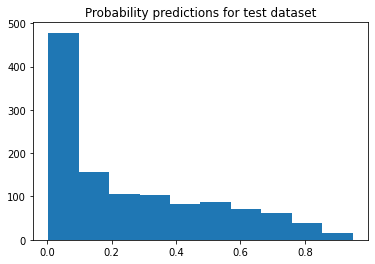

In [369]:
plt.hist(test_preds_proba)
plt.title('Probability predictions for test dataset')
plt.show()

Se observa que la probabilidad que sea de la clase 'Yes' para el set de datos de prueba es muy baja.

In [408]:
x_test.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,prob
SeniorCitizen,1.000000,0.038533,0.210575,0.116357,0.233669
tenure,0.038533,1.000000,0.284334,0.838629,-0.617723
MonthlyCharges,0.210575,0.284334,1.000000,0.663110,0.300557
TotalCharges,0.116357,0.838629,0.663110,1.000000,-0.367631
prob,0.233669,-0.617723,0.300557,-0.367631,1.000000


Al hacer correlación entre las variables numéricas la más fuerte entre la posibilidad de ser 'Yes' es con el valor de 'tenure'.

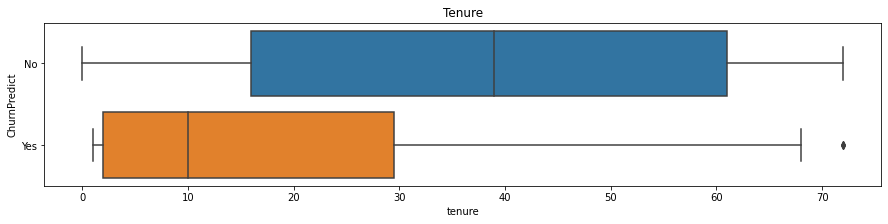

In [413]:
plt.figure(figsize = (15, 3))
sns.boxplot(data = x_test, x = 'tenure', y = 'ChurnPredict', orient = 'h')
plt.title('Tenure')
plt.show()

Se puede observar que el modelo, suele clasificar con 'Yes' a aquellos clientes que llevan menos meses.

### ¿Se evidencian problemas de overfitting o underfitting?

En este caso, en el accurracy del modelo se observa un sobrejauste del 1% cuando se comparan los resultados con los datos de entrenamiento y los datos de prueba. Es un sobreajuste muy pequeño, ahora si se observa en detalle de las clases: 

En el caso del 'No' el recall es el mismo para ambos, mientras que la precision y el f1-score es 1% mejor en los datos de prueba.

Para el caso de 'Yes', la precisión es la misma en ambos casos pero el recall y el f1-score es mejor en 1% con los datos de prueba.

Como son valores del 1%, los consideramos como un valor pequeño, por lo que como tal no vemos ni overffitting o underfiting, consideramos que el modelo esta generalizando bien.

### Investigue y describa por qué es preferible la métrica ROC AUC sobre las demás métricas como F1, Precision o Recall.

La curva receiver operating characteristic (ROC) se utiliza con frecuencia para evaluar el rendimiento de los algoritmos de clasificación binaria y permite identificar que tan bien puede distinguir el modelo entre dos categorías.  La curva ROC proporciona una representación gráfica del rendimiento de un clasificador, en lugar de un único valor como la mayoría de las demás métricas. La curva ROC se obtiene calculando y trazando la tasa de verdaderos positivos frente a la tasa de falsos positivos para un único clasificador en una variedad de umbrales (por ejemplo, en el caso de una regresión logística es de 0.5 para hacer la distinción de las dos clases). Si se quiere ver solo como métrica, se usa ROC- AUC que hace referencia al área bajo la curva ROC. Por lo general, cuanto mayor es la puntuación AUC, mejor es el rendimiento de un clasificador para una tarea determinada.

Este método es conveniente por las siguientes razones:

  * Es invariable con respecto a la escala, mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.
  * Es invariable con respecto al umbral de clasificación, mide la calidad de las predicciones del modelo, sin tener en cuenta qué umbral de clasificación se elige.


La primera gran diferencia es que las demás métricas se calcula sobre las clases predichas mientras que calcula el AUC ROC sobre las puntuaciones predichas. Esto significa que tendrá que encontrar el umbral óptimo para su problema.

En el F1, procesión y recall se tiene en cuenta las fracciones de clases positivas y negativas asignadas correctamente. En un problema muy desequilibrado, se obtendremos un accuracy realmente alto simplemente prediciendo que todas las observaciones pertenecen a la clase mayoritaria.


### Export del mejor modelo

In [365]:
dump(grid.best_estimator_, 'modelo.joblib')

['modelo.joblib']